In [7]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv(r"CLEAN_DATA/Europe_2015_2020_manifesto_gini_ps.csv")
country_profiles = pd.read_csv(r"CLEAN_DATA/country_profiles.csv")

In [3]:
# Initialize an empty dictionary to store country profiles
country_profile_dict = {}

# Iterate through each row of the country_profiles_indexed dataframe
for index, row in country_profiles.iterrows():
    # Get the country profile for the current row
    profile = row['Country Profile']
    # Iterate through the list of countries in the current row
    for country_list in row['Country'].split(', '):  # Split the country list by ', '
        # Add the country and its corresponding profile to the dictionary
        country_profile_dict[country_list] = profile

# Map the 'country' column in data dataframe to the 'Country Profile' dictionary
data['Country Profile'] = data['countryname'].map(country_profile_dict)

# Display the updated data dataframe
display(data.head())

,Unnamed: 0.1,Unnamed: 0,country,countryname,oecdmember,eumember,edate,date,party,partyname,...,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm,Gini coefficient,stance_positivity_score,Country Profile
0,0,129,11,Sweden,10,10.0,2018-09-09,201809,11110,Green Ecology Party,...,-15.966,0.000,0.168,18.487,2.353,2023a,VXLO39,0.299742,63.025,Country B
1,1,130,11,Sweden,10,10.0,2018-09-09,201809,11220,Left Party,...,-40.701,1.067,0.000,37.652,3.506,2023a,IJRAPK,0.299742,53.201,Country B
2,2,131,11,Sweden,10,10.0,2018-09-09,201809,11320,Social Democratic Labour Party,...,-20.000,0.645,0.000,22.258,0.645,2023a,GV4CQK,0.299742,68.064,Country B
3,3,132,11,Sweden,10,10.0,2018-09-09,201809,11420,Liberals,...,-1.144,1.144,2.778,16.503,0.000,2023a,7O4BQ2,0.299742,50.814,Country B
4,4,133,11,Sweden,10,10.0,2018-09-09,201809,11520,Christian Democrats,...,-12.712,2.542,0.000,34.746,0.000,2023a,4FL7IT,0.299742,55.086,Country B


In [4]:
# one-hot encode country profiles
data = pd.get_dummies(data, columns=['Country Profile'], drop_first=True)
display(data.head())

,Unnamed: 0.1,Unnamed: 0,country,countryname,oecdmember,eumember,edate,date,party,partyname,...,markeco,welfare,intpeace,datasetversion,id_perm,Gini coefficient,stance_positivity_score,Country Profile_Country B,Country Profile_Country C,Country Profile_Country D
0,0,129,11,Sweden,10,10.0,2018-09-09,201809,11110,Green Ecology Party,...,0.168,18.487,2.353,2023a,VXLO39,0.299742,63.025,1,0,0
1,1,130,11,Sweden,10,10.0,2018-09-09,201809,11220,Left Party,...,0.000,37.652,3.506,2023a,IJRAPK,0.299742,53.201,1,0,0
2,2,131,11,Sweden,10,10.0,2018-09-09,201809,11320,Social Democratic Labour Party,...,0.000,22.258,0.645,2023a,GV4CQK,0.299742,68.064,1,0,0
3,3,132,11,Sweden,10,10.0,2018-09-09,201809,11420,Liberals,...,2.778,16.503,0.000,2023a,7O4BQ2,0.299742,50.814,1,0,0
4,4,133,11,Sweden,10,10.0,2018-09-09,201809,11520,Christian Democrats,...,0.000,34.746,0.000,2023a,4FL7IT,0.299742,55.086,1,0,0


In [9]:
# linear regression
data.dropna(subset=['Gini coefficient'], inplace=True)
X = X = data.filter(regex='^Country Profile_Country', axis=1)  
y = data['Gini coefficient']

# initialize model
model = LinearRegression()

# fit model
model.fit(X,y)

# predict gini values
y_pred = model.predict(X)

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)

# Print the coefficients and MSE
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])
print("Mean Squared Error:", mse)


[0.31135133 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133
 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133
 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133
 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133
 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133
 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133
 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133
 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133
 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133 0.31908538
 0.31908538 0.31908538 0.31908538 0.31908538 0.31908538 0.31908538
 0.31908538 0.31908538 0.31908538 0.31908538 0.31908538 0.31908538
 0.31908538 0.31908538 0.31908538 0.31135133 0.31135133 0.31135133
 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133
 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133
 0.31135133 0.31135133 0.31135133 0.31135133 0.31135133 0.3113

In [6]:
coefficients = model.coef_
country_profiles = X.columns

# Create a dictionary to store country profiles and their coefficients
profile_coefficients = dict(zip(country_profiles, coefficients))

# Sort the dictionary by coefficient value
sorted_profile_coefficients = sorted(profile_coefficients.items(), key=lambda x: x[1], reverse=True)

# Print 
for profile, coefficient in sorted_profile_coefficients:
    print(f"Country Profile: {profile}, Coefficient: {coefficient}")


Country Profile: Country Profile_Country C, Coefficient: 0.08470508895652175
Country Profile: Country Profile_Country D, Coefficient: 0.020381640132992332
Country Profile: Country Profile_Country B, Coefficient: -0.007734049530873235


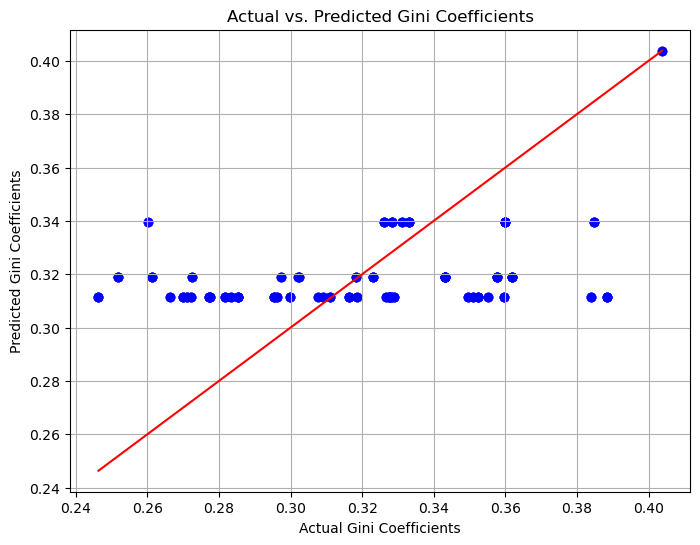

In [10]:
#getting the actual and predicted gini values
y_actual = data['Gini coefficient']

#plotting relationship between actual and predicted values of gini
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred, color='blue', alpha=0.5)  # Scatter plot of actual vs. predicted
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red')  # Diagonal line for reference
plt.title('Actual vs. Predicted Gini Coefficients')
plt.xlabel('Actual Gini Coefficients')
plt.ylabel('Predicted Gini Coefficients')
plt.grid(True)
plt.show()